## Previsão de Churn de Clientes
Nesse projeto, faremos um modelo para prever cancelamentos de clientes com base em seu...

In [1]:
### Importação de bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

### Importação e Análise Exploratória dos Dados

In [2]:
# Importando dados
df = pd.read_csv('customer_churn_data.csv')

In [3]:
# Visualização geral
df.head()

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.40,Yes,Yes
1,2,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.00,Yes,Yes
2,3,51,Female,2,63.79,Month-to-Month,Fiber Optic,127.58,No,Yes
3,4,60,Female,8,102.34,One-Year,DSL,818.72,Yes,Yes
4,5,42,Male,32,69.01,Month-to-Month,NaN,2208.32,No,Yes


In [4]:
# Tamanho do dataset
df.shape

(1000, 10)

In [5]:
# Tipo dos dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerID       1000 non-null   int64  
 1   Age              1000 non-null   int64  
 2   Gender           1000 non-null   object 
 3   Tenure           1000 non-null   int64  
 4   MonthlyCharges   1000 non-null   float64
 5   ContractType     1000 non-null   object 
 6   InternetService  703 non-null    object 
 7   TotalCharges     1000 non-null   float64
 8   TechSupport      1000 non-null   object 
 9   Churn            1000 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 78.3+ KB


In [6]:
# Valores nulos
df.isna().sum()

CustomerID           0
Age                  0
Gender               0
Tenure               0
MonthlyCharges       0
ContractType         0
InternetService    297
TotalCharges         0
TechSupport          0
Churn                0
dtype: int64

In [7]:
# Valores duplicados
df.duplicated().sum()

0

In [8]:
df['InternetService'] = df['InternetService'].fillna('')

In [9]:
df.isna().sum()

CustomerID         0
Age                0
Gender             0
Tenure             0
MonthlyCharges     0
ContractType       0
InternetService    0
TotalCharges       0
TechSupport        0
Churn              0
dtype: int64

In [10]:
# Verificando medidas estatísticas das variáveis
df.describe()

,CustomerID,Age,Tenure,MonthlyCharges,TotalCharges
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,500.500000,44.674000,18.97300,74.391290,1404.364060
std,288.819436,9.797741,18.89257,25.712083,1571.755048
min,1.000000,12.000000,0.00000,30.000000,0.000000
25%,250.750000,38.000000,5.00000,52.357500,345.217500
50%,500.500000,45.000000,13.00000,74.060000,872.870000
75%,750.250000,51.000000,26.00000,96.102500,1900.175000
max,1000.000000,83.000000,122.00000,119.960000,12416.250000


In [11]:
# Analisando colunas numéricas
numeric = df.select_dtypes(include=['number'])
numeric

,CustomerID,Age,Tenure,MonthlyCharges,TotalCharges
0,1,49,4,88.35,353.40
1,2,43,0,36.67,0.00
2,3,51,2,63.79,127.58
3,4,60,8,102.34,818.72
4,5,42,32,69.01,2208.32
...,...,...,...,...,...
995,996,42,41,37.14,1522.74
996,997,62,9,80.93,728.37
997,998,51,15,111.72,1675.80
998,999,39,68,65.67,4465.56


In [12]:
# Avaliando a correlação
numeric.corr()

,CustomerID,Age,Tenure,MonthlyCharges,TotalCharges
CustomerID,1.000000,0.036730,-0.018585,-0.030504,-0.027490
Age,0.036730,1.000000,0.000472,0.006362,-0.001896
Tenure,-0.018585,0.000472,1.000000,-0.014552,0.894868
MonthlyCharges,-0.030504,0.006362,-0.014552,1.000000,0.304893
TotalCharges,-0.027490,-0.001896,0.894868,0.304893,1.000000


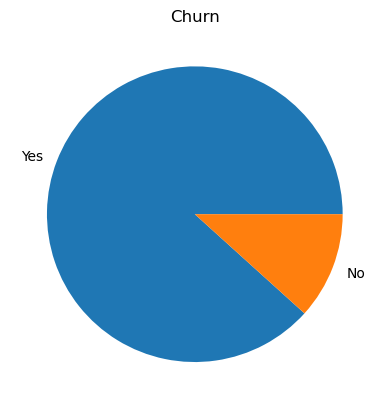

In [13]:
df['Churn'].value_counts().plot(kind='pie')
plt.title('Churn')
plt.ylabel('')
plt.show()

In [14]:
df.groupby(['Churn', 'Gender'])['Gender'].count()

Churn  Gender
No     Female     68
       Male       49
Yes    Female    470
       Male      413
Name: Gender, dtype: int64

In [15]:
# Contract Type x Churn
df.groupby('ContractType')['ContractType'].count()

ContractType
Month-to-Month    511
One-Year          289
Two-Year          200
Name: ContractType, dtype: int64

In [16]:
# Contract Type x Churn
df.groupby(['ContractType', 'Churn'])['Churn'].count()

ContractType    Churn
Month-to-Month  Yes      511
One-Year        No        71
                Yes      218
Two-Year        No        46
                Yes      154
Name: Churn, dtype: int64

In [17]:
# Tech Support x Churn
df.groupby(['TechSupport', 'Churn'])['TechSupport'].count()

TechSupport  Churn
No           Yes      494
Yes          No       117
             Yes      389
Name: TechSupport, dtype: int64

In [18]:
# Contract Type x Churn
df.groupby(['Churn', 'ContractType'])['ContractType'].count()

Churn  ContractType  
No     One-Year           71
       Two-Year           46
Yes    Month-to-Month    511
       One-Year          218
       Two-Year          154
Name: ContractType, dtype: int64

In [19]:
# Média de taxas pagas x Churn
df.groupby('Churn')['MonthlyCharges'].mean()

Churn
No     62.54641
Yes    75.96077
Name: MonthlyCharges, dtype: float64

In [20]:
# Gênero x Churn
df.groupby(['Churn', 'Gender'])['MonthlyCharges'].mean()

Churn  Gender
No     Female    65.091912
       Male      59.013878
Yes    Female    74.975064
       Male      77.082518
Name: MonthlyCharges, dtype: float64

In [21]:
# Tempo médio como cliente x Churn
df.groupby('Churn')['Tenure'].mean()

Churn
No     30.264957
Yes    17.476784
Name: Tenure, dtype: float64

In [22]:
# Média de idade x Churn 
df.groupby('Churn')['Age'].mean()

Churn
No     43.487179
Yes    44.831257
Name: Age, dtype: float64

In [23]:
# at the lower terms we can see that the monthly charge average decreases
df.groupby('ContractType')['MonthlyCharges'].mean()

ContractType
Month-to-Month    75.909198
One-Year          73.822803
Two-Year          71.334500
Name: MonthlyCharges, dtype: float64

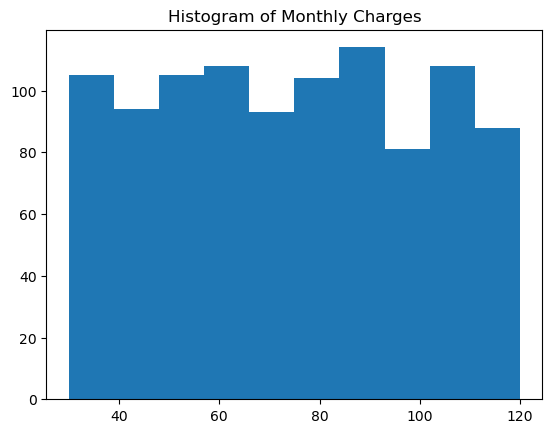

In [24]:
# 
plt.hist(df['MonthlyCharges'])
plt.title('Histogram of Monthly Charges')
plt.show()

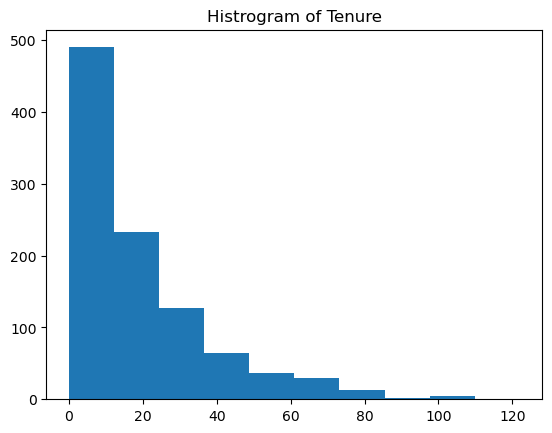

In [25]:
plt.hist(df['Tenure'])
plt.title('Histrogram of Tenure')
plt.show()

### Engenharia de Atributos

In [26]:
# Selecionando colunas que iremos utilizar
df.columns

Index(['CustomerID', 'Age', 'Gender', 'Tenure', 'MonthlyCharges',
       'ContractType', 'InternetService', 'TotalCharges', 'TechSupport',
       'Churn'],
      dtype='object')

In [27]:
# Separando em categoricas e numéricas
# categorics = ['Gender', 'ContractType', 'TechSupport', 'Churn']
# numerics = ['Age', 'Tenure', 'MonthlyCharges',]

In [28]:
# variável target
y = df['Churn']

# variáveis preditoras
X = df[['Age', 'Gender', 'Tenure', 'MonthlyCharges']]

In [29]:
X['Gender'] = X['Gender'].apply(lambda x: 1 if x == 'Female' else 0)

In [30]:
X['Gender'].head()

0    0
1    0
2    1
3    1
4    0
Name: Gender, dtype: int64

In [31]:
y = y.apply(lambda x: 1 if x == 'Yes' else 0)

In [32]:
y.head(20)

0     1
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     0
9     1
10    1
11    0
12    1
13    1
14    1
15    0
16    1
17    1
18    0
19    1
Name: Churn, dtype: int64

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [34]:
from sklearn.preprocessing import StandardScaler

In [35]:
scaler = StandardScaler()

In [36]:
X_train = scaler.fit_transform(X_train)

In [37]:
import joblib
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [38]:
X_test = scaler.fit_transform(X_test)
X_test

array([[-1.38278324e+00,  8.59726954e-01, -2.61218278e-01,
        -1.39603448e+00],
       [ 3.00518950e-01,  8.59726954e-01, -7.68438236e-01,
         9.39214932e-01],
       [ 4.98554501e-01, -1.16316000e+00,  1.89643906e-01,
        -8.53721818e-01],
       [-1.58081879e+00,  8.59726954e-01, -5.43007143e-01,
         1.09732687e+00],
       [-1.94569930e-01, -1.16316000e+00, -9.93869328e-01,
        -1.36899396e+00],
       [ 1.98382114e+00, -1.16316000e+00,  1.33286133e-01,
        -4.70272212e-01],
       [ 6.96590053e-01,  8.59726954e-01,  7.69283602e-02,
         7.15755073e-01],
       [ 2.01501174e-01,  8.59726954e-01,  5.27790545e-01,
         2.10247560e-01],
       [ 2.01501174e-01,  8.59726954e-01, -9.37511555e-01,
         1.18933975e+00],
       [-1.97688989e+00,  8.59726954e-01, -4.86649370e-01,
         1.28060151e+00],
       [ 6.96590053e-01, -1.16316000e+00, -4.86649370e-01,
        -5.62285095e-01],
       [ 1.68676781e+00, -1.16316000e+00, -6.55722690e-01,
      

In [39]:
from sklearn.metrics import accuracy_score

def modelperformance(predictions):
    print('Accuracy score on model is {}'.format(accuracy_score(y_test, predictions)))

In [40]:
from sklearn.model_selection import GridSearchCV

In [41]:
from sklearn.linear_model import LogisticRegression

In [42]:
log_model = LogisticRegression()

In [43]:
log_model.fit(X_train, y_train)

LogisticRegression()

In [45]:
y_pred = log_model.predict(X_test)

In [46]:
modelperformance(y_pred)

Accuracy score on model is 0.885
